In [123]:
import pandas as pd
import numpy as np
import seaborn as sns

In [21]:
df = pd.read_csv("data/new_encoded.csv", encoding='utf8',sep=';')
# df.apply(lambda x: pd.api.types.infer_dtype(x.values))
nova = ['data_hora',
        'nome',#0 - String
        'idade',#1 - Number
        'sexo',#2 - Categórico
        'cidade/estado',#3 - String
        'escolaridade',#4 - Categórico
        'profissao',#5 - String
        'valor_fofoca',#6 - Categórico
        'fofoca_sobre_mim_e',#7 - Categórico
        'fofoca_e',#8 - Qualitatica ( open question )
        'viver_sem_fofoca',#9 - Categórico
        'voce_fofoca',#10 - Categórico
        'o_que_e_fofoqueiro',#11 - Qualitativa (open question)
        'se_acha_fofoqueiro',#12 - Categórico
        'moralmente_ser_fofoqueiro',#13 - Categórico
        'quem_fofoca_mais',#14 - Categórico
        'que_idade_fofoca',#15 - CheckBox (open question)
        'conhece_fofoqueiro',#16 - Categórico
        'fofoca_sempre_negativo',#17 - Categórico
        'temas_frequentes',#18 - Categórico
        'temas_interessam',#19 - Qualitativa (open question)
        'aprendeu_algo',#20 - Qualitativa ( open question )
        'caso_interessante',#21 - Qualitativa ( open question )
        'nao_e_assunto',#22 - Qualitativa ( open question )
        'onde',#23 - Qualitativa ( open question )
        'palavras_relacionadas',#24 - Checkbox ( open question )
        'conhece_beneficiado',#25 - Categorico
        'conhece_prejudicado',#26 - Categorico
        'foi_prejudicado',#27 - Categorico
        'prejudicou_alguem',#28 - Categorico
        'sente_quando_conta',#29 - Qualitativa ( open question )
        'sente_quando_ouve',#30 - Qualitativa ( open question )
        'faz_ou_sente_sobre_conhecido',#31 - Qualitativa ( open question )
        'na_internet',#32 - Qualitativa ( open question )
        'termo_diferente',#33 - Qualitativa ( open question )
        ]
questions = df.columns
df.columns = nova

In [112]:
for i in questions:
    print(i)

Carimbo de data/hora
NOME, APELIDO, OU NÚMERO (PARA CONTROLE INTERNO)
1-	QUAL A SUA IDADE?
2-	QUAL O SEU SEXO?
3-	QUAL A SUA CIDADE E ESTADO?
4-	QUAL A SUA ESCOLARIDADE?
5-	QUAL A SUA PROFISSÃO/OCUPAÇÃO?
6-	VOCÊ PENSA NA FOFOCA COMO UMA COISA: 
7-	QUANDO A FOFOCA É A SEU RESPEITO, VOCÊ ACHA ISSO:
8-	PARA VOCÊ, O QUE É A FOFOCA? (ESCREVA UMA DEFINIÇÃO) 
9-    É POSSÍVEL VIVER SEM FOFOCAR?
10-	VOCÊ FOFOCA: 
11- PARA VOCÊ O QUE É UM(A) FOFOQUEIRO(A)?
12-	VOCÊ SE ACHA FOFOQUEIRO(A)?
13-	VOCÊ ACHA QUE (MORALMENTE) SER FOFOQUEIRO É:
14 - QUEM VOCÊ ACHA QUE FOFOCA MAIS?
15 - EM QUAL IDADE SE FOFOCA MAIS ? (marque no máximo 2)
16-	VOCÊ CONHECE PESSOALMENTE UMA PESSOA FOFOQUEIRA?
17- VOCÊ ACHA QUE O QUE SE FALA NA FOFOCA É SEMPRE NEGATIVO?
18-	QUAIS TEMAS VOCÊ ACHA MAIS FREQUENTES NA FOFOCA? (MARQUE TODAS QUE SE APLICAM)
19-	QUE TEMA(S) TE INTERESSA(M) MAIS EM UMA FOFOCA?
20- VOCÊ JÁ APRENDEU ALGO QUE PUDESSE USAR PARA A SUA VIDA NUMA FOFOCA? SE SIM, O QUÊ?
21-	VOCÊ CONHECE ALGUM CASO INTERESSA

In [83]:
palavras_relacionadas = df["palavras_relacionadas"][-10:]
palavras_relacionadas[131]

'MENTIRA, BOATO, CONFUSÃO, INTIMIDADE, CURIOSIDADE, SUSSURRO, CONTROLE, ESCONDIDO, NOVIDADE, FUXICO, MANIPULAÇÃO, COXIXO'

In [106]:
sente_quando_conta = df['sente_quando_conta'][:5]
sente_quando_conta[1]

'ALEGRIA POR COMPARTILHAR ALGO QUE EU SEI, ALÍVIO'

In [85]:
from leia import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

def discretizacao_sentimento(review: str):
    sentiment_dict = sentiment.polarity_scores(review)
    # compound é uma média ponderada dos valores que compõem o sentimento
    cmp = sentiment_dict['compound']
    # rating = round(0.5 * (1 + 5 + (cmp * (5 - 1))))
    rating = cmp
    return rating

In [111]:
discretizacao_sentimento(palavras_relacionadas[131])

-0.1531

In [127]:
df["sentimento"] = df['sente_quando_conta'].apply(lambda x: discretizacao_sentimento(review=x) if(np.all(pd.notnull(x))) else 5)

In [119]:
df['sente_quando_conta']

0                                                 NORMAL
1       ALEGRIA POR COMPARTILHAR ALGO QUE EU SEI, ALÍVIO
2                                      PRAZER E VERGONHA
3                                                 NORMAL
4                                             SATISFAÇÃO
                             ...                        
132    Nada específico, se for algo assumidamente mal...
133                                                  NaN
134                                   Geralmente culpada
135    Nada pq não dou continuação e qdo veem.me fala...
136                                                  NaN
Name: sente_quando_conta, Length: 137, dtype: object

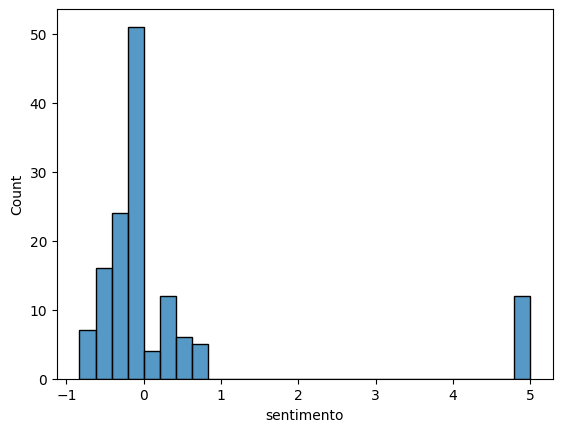

In [128]:
df["sentimento"]
sns.histplot(data=df, x="sentimento");

In [129]:
df["sentimento"]

0      0.0000
1      0.8176
2      0.2732
3      0.0000
4      0.3612
        ...  
132   -0.4243
133    5.0000
134    0.0000
135   -0.2960
136    5.0000
Name: sentimento, Length: 137, dtype: float64

In [148]:
sentiment.polarity_scores("ALEGRIA POR COMPARTILHAR ALGO QUE EU SEI, ALÍVIO")


{'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compound': 0.8176}

não acho nada
isso nao é ruim
ALEGRIA POR COMPARTILHAR ALGO QUE EU SEI, ALÍVIO
